# The Iris Dataset

In this analysis, we will apply the kNN (k-Nearest Neighbors) algorithm to solve a classification problem using the Iris dataset. The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width. The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


**#1.** The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/. 

**#2.** The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the data from the file (iris.data) into the DataFrame
# Assigning meaningful column names
iris = pd.read_csv('iris.data.txt', sep=',', 
                   header=None,  # the data file does not contain a header
                   names=['Sepal Length','Sepal Width','Petal Length','Petal Width','Class'] # names of columns
                  )

# Display the first 5 rows of the dataset
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Petal Width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


As expected, the data consists of 5 columns of data, where 4 columns contain numeric data and the column `Class` is a string data type. There are no null values and the total number of rows is 150. There are 3 classes of irises with 50 rows of data for each class.

Text(0.5, 20.80000000000002, 'Sepal Width')

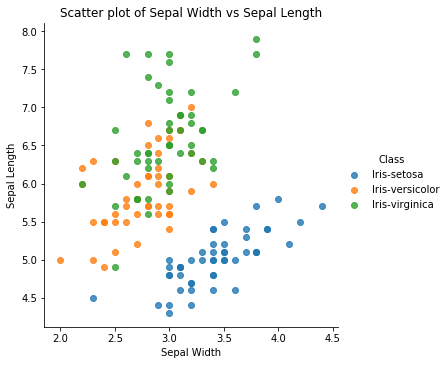

In [4]:
# Prepare 2 scatter plots

# sepal_width vs sepal_length
sns.lmplot(data = iris, x = 'Sepal Width', y = 'Sepal Length', hue = 'Class', fit_reg = False)
plt.title('Scatter plot of Sepal Width vs Sepal Length')
plt.ylabel('Sepal Length')
plt.xlabel('Sepal Width')

Text(0.5, 20.80000000000002, 'Petal Width')

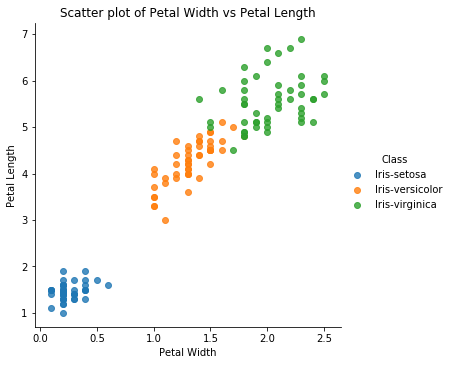

In [5]:
# petal_width vs petal_length 
sns.lmplot(data = iris, y = 'Petal Length', x = 'Petal Width', hue = 'Class', fit_reg = False)
plt.title('Scatter plot of Petal Width vs Petal Length')
plt.ylabel('Petal Length')
plt.xlabel('Petal Width')

In [6]:
# Prepare the feature variables X and the response Y for the fit
#X = iris.values[:, 0:4] 
#Y = iris.values[:, 4]   

X = np.array(iris.iloc[:, 0:4])   # Select feature variable 
Y = np.array(iris['Class'])       # Set target variable

In [7]:
# Split the dataset into 30% testing and 70% training 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [8]:
# Run the fit using KNeighborsClassifier from sklearn.neighbors.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate learning model (k=3)
model = KNeighborsClassifier(n_neighbors = 3)  
# Run the classifier on the training set
model.fit(X_train, Y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [9]:
# Predict the response
prediction = model.predict(X_test) 

# Compare accuracy of predicted classes with test data
accuracy = accuracy_score(Y_test, prediction) * 100
print('K-Nearest Neighbours accuracy: ' + str(accuracy) + '%') 

K-Nearest Neighbours accuracy: 93.33333333333333%


In [10]:
# Count the numbers of correct predictions and predictions that were wrong
count = 0

for i in range(len(Y_test)):
    if Y_test[i] == prediction[i]:
        count += 1
        
print('Number of correct predictions: ' + str(count))
print('Number of wrong predictions: ' + str(len(Y_test) - count))

Number of correct predictions: 42
Number of wrong predictions: 3


Next, we want to see how accuracy score and the number of correct predictions change with the number of neighbors k. **We will use the following number of neighbors k: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
- Generate 10 random train/test splits for each value of `k`
- Fit the model for each split and generate predictions
- Average the accuracy score for each `k`
- Calculate the average number of correct predictions for each `k` as well
- Plot the accuracy score for different values of `k`

In [11]:
# To see how accuracy score and the number of correct predictions change with the number of neighbors k
from sklearn.model_selection import cross_val_score

num_splits = 10
k_vals = [1, 3, 5, 7, 10, 20, 30, 40, 50]
accuracies = []
comparisons = []

for k in k_vals:
    acc_samples = []
    comp_samples = []
    for i in range(num_splits):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc_samples.append(accuracy_score(y_test, y_pred))
        comp_samples.append(np.count_nonzero(y_test == y_pred))
    accuracies.append(np.mean(acc_samples))
    comparisons.append(np.mean(comp_samples))

compare_df = pd.DataFrame({'Correct Predictions':comparisons,'Accuracy Score':accuracies}, index=[k_vals])
compare_df

,Correct Predictions,Accuracy Score
1,42.8,0.951111
3,43.6,0.968889
5,43.4,0.964444
7,43.5,0.966667
10,43.6,0.968889
20,43.0,0.955556
30,42.7,0.948889
40,40.9,0.908889
50,40.4,0.897778


Text(0.5, 1.0, 'Value of K for KNN vs Cross-validated Accuracy')

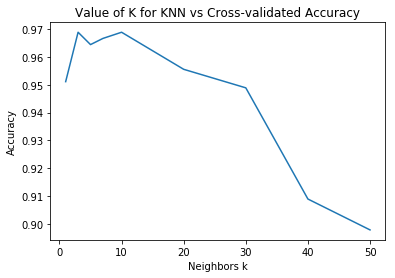

In [12]:
# Show how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_vals,compare_df['Accuracy Score'])
plt.xlabel('Neighbors k')
plt.ylabel('Accuracy')
plt.title('Value of K for KNN vs Cross-validated Accuracy')

The general shape of the curve is an upside down yield. It shows that low values of k have low bias and high vairiance, which is more likely to overfit. Whereas high values of k shows underfit. Based on the graph, the best value seems to be the middle of k (most likely to generalize out-of-sample data). Hence, we should choose k = 20 as our best KNN model.